# AirBnB Analytics - Notebook de EDA

#### Importar librerias necesarias.

In [1017]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
import geopy

#### Cargar ficheros csv. Se excluyen los dos ficheros de Excel que estaban dentro de la misma carpeta y que parecen haber sido creados por error.

In [1018]:
london_airbnb = pd.read_csv('../raw_data/london_airbnb.csv', sep=',')

madrid_airbnb = pd.read_csv('../raw_data/madrid_airbnb.csv', sep=',')

milan_airbnb = pd.read_csv('../raw_data/milan_airbnb.csv', sep=',')

NY_airbnb = pd.read_csv('../raw_data/NY_airbnb.csv', sep=',')

sydney_airbnb = pd.read_csv('../raw_data/sydney_airbnb.csv', sep=',')

tokyo_airbnb = pd.read_csv('../raw_data/tokyo_airbnb.csv', sep=',')

df_list = [london_airbnb, milan_airbnb, NY_airbnb, sydney_airbnb, tokyo_airbnb, madrid_airbnb]



#### Insert columna 'city' como paso previo para unir todos los ficheros en uno solo.

In [1019]:
# Assuming df_list contains the DataFrames
df_list = [london_airbnb, milan_airbnb, NY_airbnb, sydney_airbnb, tokyo_airbnb, madrid_airbnb]

# Loop through each DataFrame in df_list
for df in df_list:
    # Extract the city name from the variable name
    city_val = [name for name in globals() if globals()[name] is df][0].split('_')[0]
    
    # Add a new column 'letters' with the city_val (optional content) 
    df['city'] = city_val.capitalize()  # You can adjust what content should go in 'letters'

    # Append the updated DataFrame to the new list



#### Explicación del contenido de los ficheros

Aquí te explico lo que contiene cada columna de tu dataframe basado en la muestra de datos:

1. **id**: Identificador único del anuncio en la plataforma de AirBnB.
   - Ejemplo: `11551.0`

2. **name**: Nombre o título descriptivo del alojamiento.
   - Ejemplo: `Arty and Bright London Apartment in Zone 2`

3. **host_id**: Identificador único del anfitrión que ofrece el alojamiento.
   - Ejemplo: `43039.0`

4. **host_name**: Nombre del anfitrión del alojamiento.
   - Ejemplo: `Adriano`

5. **neighbourhood_group**: Agrupación geográfica más amplia de los vecindarios. En muchos casos, este campo es nulo.
   - Ejemplo: `NaN` (no disponible en esta muestra)

6. **neighbourhood**: Nombre del vecindario donde se ubica el alojamiento.
   - Ejemplo: `Lambeth`

7. **latitude**: Latitud de la ubicación del alojamiento (la latitud de la ubicación puede estar mal formateada, ya que parece incluir caracteres innecesarios en este caso).
   - Ejemplo: `51.4225`

8. **longitude**: Longitud de la ubicación del alojamiento (al igual que con la latitud, el formato podría ser incorrecto).
   - Ejemplo: `-11.732` (este parece estar bien, pero debería revisarse la consistencia con la latitud)

9. **room_type**: Tipo de habitación o alojamiento ofrecido (ejemplo: apartamento completo o habitación privada).
   - Ejemplo: `Entire home/apt`

10. **price**: Precio por noche del alojamiento, expresado en la moneda local.
    - Ejemplo: `88.0`

11. **minimum_nights**: Número mínimo de noches requeridas para reservar el alojamiento.
    - Ejemplo: `3.0`

12. **number_of_reviews**: Cantidad total de reseñas que ha recibido el alojamiento.
    - Ejemplo: `185.0`

13. **last_review**: Fecha de la última reseña recibida para el alojamiento.
    - Ejemplo: `2019-09-15`

14. **reviews_per_month**: Promedio de reseñas recibidas por mes.
    - Ejemplo: `1.58`

15. **calculated_host_listings_count**: Número de anuncios que tiene el anfitrión en la plataforma (puede estar mal etiquetado o no ser consistente, ya que parece un valor numérico pero está como string en algunos casos).
    - Ejemplo: `2.0`

16. **availability_365**: Número de días que el alojamiento está disponible para reservar en un año.
    - Ejemplo: `336.0`

17. **city**: Ciudad donde se encuentra el alojamiento.
    - Ejemplo: `London`

Revisar el formato de algunos campos, como **latitude** y **longitude**, sería importante para garantizar la precisión en el análisis.

---

#### Crear una pequeña tabla con todas las columnas de cada dataframe para identificar qué datasets tienen columnas faltantes.

In [1020]:
# Assuming df_list contains the DataFrames
df_list = {
    'london_airbnb': london_airbnb,
    'milan_airbnb': milan_airbnb,
    'NY_airbnb': NY_airbnb,
    'sydney_airbnb': sydney_airbnb,
    'tokyo_airbnb': tokyo_airbnb,
    'madrid_airbnb': madrid_airbnb
}

# Initialize an empty set to collect all unique column names
all_columns = set()

# Collect all unique column names from each DataFrame
for df in df_list.values():
    all_columns.update(df.columns.tolist())  # Convert to list to avoid ambiguous truth value

# Convert the set of all columns to a sorted list (for consistent ordering)
all_columns = sorted(all_columns)

# Create a dictionary to hold the presence/absence of each column in each DataFrame
column_presence = {name: [col in df.columns.tolist() for col in all_columns] for name, df in df_list.items()}

# Create a DataFrame that shows the presence of each column in each DataFrame
column_summary = pd.DataFrame(column_presence, index=all_columns)

# Reset index to turn column names into a regular column
column_summary.reset_index(inplace=True)
column_summary.rename(columns={'index': 'Column'}, inplace=True)

# Show the resulting table
column_summary.head()



,Column,london_airbnb,milan_airbnb,NY_airbnb,sydney_airbnb,tokyo_airbnb,madrid_airbnb
0,availability_365,True,True,True,True,False,True
1,calculated_host_listings_count,True,True,True,True,False,True
2,city,True,True,True,True,True,True
3,host_id,True,True,True,True,True,True
4,host_name,True,True,True,True,True,True


#### Mezclar todos los dataframes en uno solo

In [1021]:
# Assuming df_list contains the DataFrames
df_list = [london_airbnb, milan_airbnb, NY_airbnb, sydney_airbnb, tokyo_airbnb, madrid_airbnb]

# Concatenate all DataFrames, keeping all columns
df = pd.concat(df_list, ignore_index=True, sort=False)

#### Insertar el valor 'no definido' en las columnas faltantes en los dataframes de Milan y Tokyo

In [1022]:
## Asigna el valor "no_definido" a las columnas que no estaban incluidas en los dataframes originales
df.loc[df['city'] == 'Tokyo', 'availability_365'] = np.nan
df.loc[df['city'] == 'Tokyo', 'calculated_host_listings_count'] = np.nan
df.loc[df['city'] == 'Milan', 'neighbourhood_group'] = np.nan

#### Para el caso de los barrios en Milan, cambiar el formato para que no sean todo mayúsculas.

In [1023]:
# Apply title case to neighbourhood column where city is Milan and neighbourhood is in upper case
milan_mask = (df['city'] == 'Milan') & (df['neighbourhood'].str.isupper())
df.loc[milan_mask, 'neighbourhood'] = df.loc[milan_mask, 'neighbourhood'].str.title()

In [1024]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220031 entries, 0 to 220030
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              220031 non-null  int64  
 1   name                            219964 non-null  object 
 2   host_id                         220031 non-null  int64  
 3   host_name                       219325 non-null  object 
 4   neighbourhood_group             68513 non-null   object 
 5   neighbourhood                   220031 non-null  object 
 6   latitude                        220031 non-null  float64
 7   longitude                       220031 non-null  float64
 8   room_type                       220031 non-null  object 
 9   price                           220031 non-null  int64  
 10  minimum_nights                  220031 non-null  int64  
 11  number_of_reviews               220031 non-null  int64  
 12  last_review     

#### Conteos varios de las características de los campos

In [1025]:

# Number of records by city
records_by_city = df['city'].value_counts()
print("Number of records by city:")
print(records_by_city)

# Number of records with incorrect latitude by city
incorrect_latitude_by_city = df[~df['latitude'].apply(is_valid_latitude)]['city'].value_counts()
print("\nNumber of records with incorrect latitude by city:")
print(incorrect_latitude_by_city)

# Number of records with incorrect longitude by city
incorrect_longitude_by_city = df[~df['longitude'].apply(is_valid_longitude)]['city'].value_counts()
print("\nNumber of records with incorrect longitude by city:")
print(incorrect_longitude_by_city)

# Number of records with incorrect latitude and longitude by city
incorrect_lat_long_by_city = df[~df['latitude'].apply(is_valid_latitude) & ~df['longitude'].apply(is_valid_longitude)]['city'].value_counts()
print("\nNumber of records with incorrect latitude and longitude by city:")
print(incorrect_lat_long_by_city)

# Number of duplicated records where id is the column to compare
duplicated_records_by_id = df[df.duplicated(subset='id', keep=False)]['id'].nunique()
print("\nNumber of duplicated records where id is the column to compare:")
print(duplicated_records_by_id)

# Number of distinct records where id is the column to compare
distinct_records_by_id = df['id'].nunique()
print("\nNumber of distinct records where id is the column to compare:")
print(distinct_records_by_id)


Number of records by city:
city
London    85068
Ny        48895
Sydney    36662
Madrid    19618
Milan     18322
Tokyo     11466
Name: count, dtype: int64

Number of records with incorrect latitude by city:
Series([], Name: count, dtype: int64)

Number of records with incorrect longitude by city:
Series([], Name: count, dtype: int64)

Number of records with incorrect latitude and longitude by city:
Series([], Name: count, dtype: int64)

Number of duplicated records where id is the column to compare:
0

Number of distinct records where id is the column to compare:
220031


#### Eliminar registros duplicados. Utilizando el parametro keep = 'last' en este dataset nos sirve para eliminar el registro con latitud y longitud incorrecta

In [1026]:
# Remove duplicated records based on 'id' column
df.drop_duplicates(subset='id', keep='last', inplace=True)

# Display the shape of the DataFrame to verify the changes
print(df.shape)

(220031, 17)


##### Procedimientos para revisar los valores de latitud y longitud. esto era necesario cuando se habían importado los ficheros de Excel, ya que tenían mal estos valores. Al importar solo los ficheros csv, ese problema desapareció. No los hemos borrado porque pueden ser necesarios.

In [1027]:
# Funciones comunes de calidad de los datos

# Sample function to check if latitude is valid
def is_valid_latitude(latitude):
    try:
        lat = float(latitude)
        return -90 <= lat <= 90
    except ValueError:
        return False

# Sample function to check if longitude is valid
def is_valid_longitude(longitude):
    try:
        lon = float(longitude)
        return -180 <= lon <= 180
    except ValueError:
        return False

In [1028]:
# Filter the DataFrame to get records with incorrect longitude
incorrect_longitude_records = df[~df['longitude'].apply(is_valid_longitude)]

# Display the records with incorrect longitude
print(incorrect_longitude_records)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, city]
Index: []


#### Remover registros con id nulo. Este problema también viene de la importación de ficheros de Excel, los ficheros csv no tenían este problema.

In [1029]:
# Count the number of records with null id
null_id_count = df['id'].isnull().sum()

# Remove records where id is null
df = df.dropna(subset=['id'])

# Print the number of records affected
print(f"Number of records with null id removed: {null_id_count}")

Number of records with null id removed: 0


#### Analizar Neighbourhood group para intentar corregir valores nulos.

In [1030]:
# Create a frequency table of neighbourhood and neighbourhood_group by city, including records where neighbourhood_group is null
frequency_table = df.groupby(['city', 'neighbourhood', 'neighbourhood_group'], dropna=False).size().reset_index(name='count')

# Display the frequency table
frequency_table.head()


,city,neighbourhood,neighbourhood_group,count
0,London,Barking and Dagenham,NaN,372
1,London,Barnet,NaN,1659
2,London,Bexley,NaN,269
3,London,Brent,NaN,2561
4,London,Bromley,NaN,679


Londres, Milan, Syndey y Tokyio no tienen información del Neighborhood Group.

He intentado corregirla buscando informacion de distritos pero está tomando mucho tiempo. De momento lo dejo así.



### Exploratory Data Analysis

In [1031]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220031 entries, 0 to 220030
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              220031 non-null  int64  
 1   name                            219964 non-null  object 
 2   host_id                         220031 non-null  int64  
 3   host_name                       219325 non-null  object 
 4   neighbourhood_group             68513 non-null   object 
 5   neighbourhood                   220031 non-null  object 
 6   latitude                        220031 non-null  float64
 7   longitude                       220031 non-null  float64
 8   room_type                       220031 non-null  object 
 9   price                           220031 non-null  int64  
 10  minimum_nights                  220031 non-null  int64  
 11  number_of_reviews               220031 non-null  int64  
 12  last_review     

#### Este paso siguiente de convertir características numericas a Float fue necesario debido a los ficheros de Excel. Con los ficheros csv no había problema

In [1032]:
# Convert latitude, longitude, and availability_365 to float64
df['latitude'] = df['latitude'].astype('float64')
df['longitude'] = df['longitude'].astype('float64')
df['availability_365'] = df['availability_365'].astype('float64')


#### Breve análisis de las características con el comando describe

In [1033]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.200310e+05,2.200310e+05,220031.000000,220031.000000,2.200310e+05,220031.000000,220031.000000,165660.000000,208565.000000,208565.000000
mean,2.240831e+07,8.494528e+07,32.573053,16.428135,9.178157e+02,5.258023,20.129164,1.256772,14.189471,120.330918
std,1.175490e+07,8.856607e+07,30.144854,76.030471,8.285217e+03,20.118261,43.012277,1.524449,75.122354,134.644491
min,2.539000e+03,1.944000e+03,-34.135212,-74.244420,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.338370e+07,1.439602e+07,40.412620,-3.705870,5.500000e+01,1.000000,1.000000,0.200000,1.000000,0.000000
50%,2.249789e+07,4.640392e+07,40.794240,-0.128380,9.900000e+01,2.000000,4.000000,0.690000,1.000000,64.000000
75%,3.155445e+07,1.415097e+08,51.496200,9.199535,1.770000e+02,4.000000,19.000000,1.800000,3.000000,244.000000
max,5.095505e+07,4.117208e+08,51.681690,151.339811,1.000046e+06,1250.000000,896.000000,58.500000,999.000000,365.000000


In [1034]:
df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,city
count,219964,219325,68513,220031,220031,165660,220031
unique,213293,31499,26,562,4,4660,6
top,Home away from home,David,Manhattan,Westminster,Entire home/apt,2019-06-23,London
freq,53,1418,21661,9588,128154,1946,85068


### Análisis de fechas

#### Esta es la cantidad original de nulos en last_review

In [1035]:
# Count the number of null records before conversion
null_count_before = df['last_review'].isnull().sum()
print(f"Number of null records before conversion: {null_count_before}")

Number of null records before conversion: 54371


invalid_last_review_df son los registros que tienen un formato de fecha incorrecto.

In [1036]:
# Convert 'last_review' to datetime64[ns] with errors='coerce' to handle invalid parsing
df['last_review_converted'] = pd.to_datetime(df['last_review'], errors='coerce')

# Filter the DataFrame to get records where 'last_review_converted' is NaT (Not a Time)
invalid_last_review_df = df[df['last_review_converted'].isna() & df['last_review'].notna()]

# Drop the temporary 'last_review_converted' column
df.drop(columns=['last_review_converted'], inplace=True)

# Display the DataFrame with invalid 'last_review' values
invalid_last_review_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city,last_review_converted
85068,6400,The Studio Milan,13822,Francesca,NaN,Tibaldi,45.44119,9.17813,Private room,100,4,12,19/04/10,0.14,1.0,358.0,Milan,NaT
85069,23986,""" Characteristic Milanese flat""",95941,Jeremy,NaN,Navigli,45.44806,9.17373,Entire home/apt,150,1,15,07/09/20,0.21,1.0,363.0,Milan,NaT
85070,28300,nice flat near the park,121663,Marta,NaN,Sarpi,45.47647,9.17359,Private room,180,1,8,22/04/12,0.11,1.0,365.0,Milan,NaT
85071,32119,Nico & Cynthia's Easy Yellow Suite,138683,Nico&Cinzia,NaN,Viale Monza,45.52014,9.22300,Entire home/apt,75,2,15,01/07/18,0.23,3.0,200.0,Milan,NaT
85072,32649,Nico&Cinzia's Red Easy Suite!,138683,Nico&Cinzia,NaN,Viale Monza,45.51874,9.22495,Entire home/apt,71,2,29,23/10/16,0.71,3.0,308.0,Milan,NaT


#### Análisis rápido de fechas con formato incorrecto por ciudad (Sólo Milán tiene formato incorrrecto)

In [1037]:
# Group invalid_last_review_df by city and count the number of records
invalid_last_review_count_by_city = invalid_last_review_df.groupby('city').size()
print(invalid_last_review_count_by_city)


city
Milan    13260
dtype: int64


En el dataframe temporal, intentar convertir last_review_converted a datetime64[ns]. Como se utiliza la opción coerce, se convertirían en nulos aquellos valores que no puedan cambiarse correctamente.

In [1038]:
# Convert 'last_review' to datetime64[ns] with the specified format 'DD/MM/YY'
invalid_last_review_df['last_review_converted'] = pd.to_datetime(invalid_last_review_df['last_review'], format='%d/%m/%y', errors='coerce')


C:\Users\jvazq\AppData\Local\Temp\ipykernel_2672\2076412246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invalid_last_review_df['last_review_converted'] = pd.to_datetime(invalid_last_review_df['last_review'], format='%d/%m/%y', errors='coerce')


Actualiza df['last_review'] con el valor correcto de fecha que esta en invalid_last_review_df

In [1039]:
# Update df['last_review'] with invalid_last_review_df['last_review_converted']
df.update(invalid_last_review_df[['last_review_converted']].rename(columns={'last_review_converted': 'last_review'}))


Validación final de la conversión a datetime en toda la columna. Los nulos tienen que ser los mismos antes y después de intentar convertir a fecha

In [1040]:
# Count the number of null records before conversion
null_count_before = df['last_review'].isnull().sum()
print(f"Number of null records before conversion: {null_count_before}")

# Convert 'last_review' to datetime64[ns] with errors='coerce' to handle invalid parsing
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Count the number of null records after conversion
null_count_after = df['last_review'].isnull().sum()
print(f"Number of null records after conversion: {null_count_after}")

Number of null records before conversion: 54371
Number of null records after conversion: 54371


Confirmar que last_review ya es del tipo datetime

In [1041]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220031 entries, 0 to 220030
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              220031 non-null  int64         
 1   name                            219964 non-null  object        
 2   host_id                         220031 non-null  int64         
 3   host_name                       219325 non-null  object        
 4   neighbourhood_group             68513 non-null   object        
 5   neighbourhood                   220031 non-null  object        
 6   latitude                        220031 non-null  float64       
 7   longitude                       220031 non-null  float64       
 8   room_type                       220031 non-null  object        
 9   price                           220031 non-null  int64         
 10  minimum_nights                  220031 non-null  int64  


#### Rellenando los nulos en last_review y reviews_per_month y calculando la fecha de publicación

1. Utilizando reviews_per_month y number_of_reviews se obtiene el numero de meses "activo" de una publicación.

2. Para cada ciudad, se asume que la fecha máxima de last review corresponde al día que se extrajo la información de dicha ciudad.

3. Por cada publicación, se resta el número de meses activo desde la fecha máxima por ciudad.

4. Hay algunos casos donde después de hacer esto la fecha de publicación era mayor que la fecha del último comentario. Para rescatar ese 8% de los registros, que no son pocos. se optó por asignar como fecha de publicación la misma fecha del útimo comentario. Puede tener sentido porque en general esos registros no tienen apenas reviews.

5. Los registros que no tenían fecha de last_review se se consideran como nuevos y se les asigna como fecha de last review y de publicación la misma fecha maxima del dataset para esa ciudad.

6. 36% de los registros tienen availability_365 = 0 y aunque no pueden considerarse definitivamente inactivos, sí es necesario tener en cuenta esta consideración.

7. Se elimina la lógica de anuncios inactivos ya que deja de tener sentido con todos los registros llenos y aceptando que availability_365 es un dato que da pistas sobre la actividad.

In [1042]:

# Generate the 'months_published' column by dividing 'number_of_reviews' by 'reviews_per_month'
df['months_published'] = df['number_of_reviews'] / df['reviews_per_month']

# Find the maximum 'last_review' date for each city
max_last_review_by_city = df.groupby('city')['last_review'].max().reset_index()
max_last_review_by_city.rename(columns={'last_review': 'max_last_review'}, inplace=True)

# Merge the maximum 'last_review' date back into the original DataFrame
df = df.merge(max_last_review_by_city, on='city', how='left')

# Use the maximum 'last_review' date to create 'date_published' by subtracting the number of months. If resulting date is greater than 'last_review', use 'last_review' instead
df['date_published'] = df.apply(
    lambda row: (
        row['last_review'] if (
            pd.notnull(row['last_review']) and 
            pd.notnull(row['max_last_review']) and 
            pd.notnull(row['months_published']) and 
            (row['max_last_review'] - pd.DateOffset(months=int(row['months_published']))) > row['last_review']
        ) else (
            row['max_last_review'] - pd.DateOffset(months=int(row['months_published'])) if (
                pd.notnull(row['max_last_review']) and 
                pd.notnull(row['months_published'])
            ) else row['max_last_review'] if pd.notnull(row['max_last_review']) and pd.isnull(row['last_review']) else None
        )
    ),
    axis=1
)

# Fill 'reviews_per_month' with 'number_of_reviews' where both 'last_review' and 'reviews_per_month' are null
df.loc[df['last_review'].isnull() & df['reviews_per_month'].isnull(), 'reviews_per_month'] = df['number_of_reviews']

# Update 'last_review' with 'date_published' where 'last_review' is null
df['last_review'] = df.apply(
    lambda row: row['max_last_review'] if pd.isnull(row['last_review']) and pd.notnull(row['max_last_review']) else row['last_review'],
    axis=1
)

# Drop the intermediate columns
df.drop(columns=['max_last_review','months_published'], inplace=True)



#### Creación de columnas de precio en USD y EUR, además de la columna en moneda local que ya se incluía en el dataset

Se asignan las tasas de conversión mensuales históricas del último mes completo previo a la fecha de extracción de los ficheros que se considera como tal la fecha máxima de last_review por ciudad. 

In [1043]:
# Provided city dictionary
city_dict = {
    'London': {'USD': 1.2940, 'EUR': 1.1598},
    'Milan': {'USD': 1.1857, 'EUR': 1.00},
    'Ny': {'USD': 1.00, 'EUR': 0.8797},
    'Sydney': {'USD': 0.7046, 'EUR': 0.6151},
    'Tokyo': {'USD': 0.00921, 'EUR': 0.00825},
    'Madrid': {'USD': 1.17, 'EUR': 1.00}
}

# Convert the city dictionary to a DataFrame
city_df = pd.DataFrame.from_dict(city_dict, orient='index').reset_index()
city_df.rename(columns={'index': 'city'}, inplace=True)

# Assuming max_last_review_city is your existing DataFrame
# Merge the city_df with max_last_review_city on the 'city' column
#max_last_review_by_city = max_last_review_by_city.merge(city_df, on='city', how='left')

df = df.merge(city_df, on='city', how='left')

df['price_usd'] = df.apply(
    lambda row: row['price'] * row['USD'] if pd.notnull(row['price']) else pd.NaN,
    axis=1
)

df['price_eur'] = df.apply(
    lambda row: row['price'] * row['EUR'] if pd.notnull(row['price']) else pd.NaN,
    axis=1
)

df['price_usd'] = df['price_usd'].round(2)
df['price_eur'] = df['price_eur'].round(2)

# Drop the intermediate columns
df.drop(columns=['USD','EUR'], inplace=True)

Analizar gráficamente la distribución de las publicaciones de anuncios por fecha de publicación

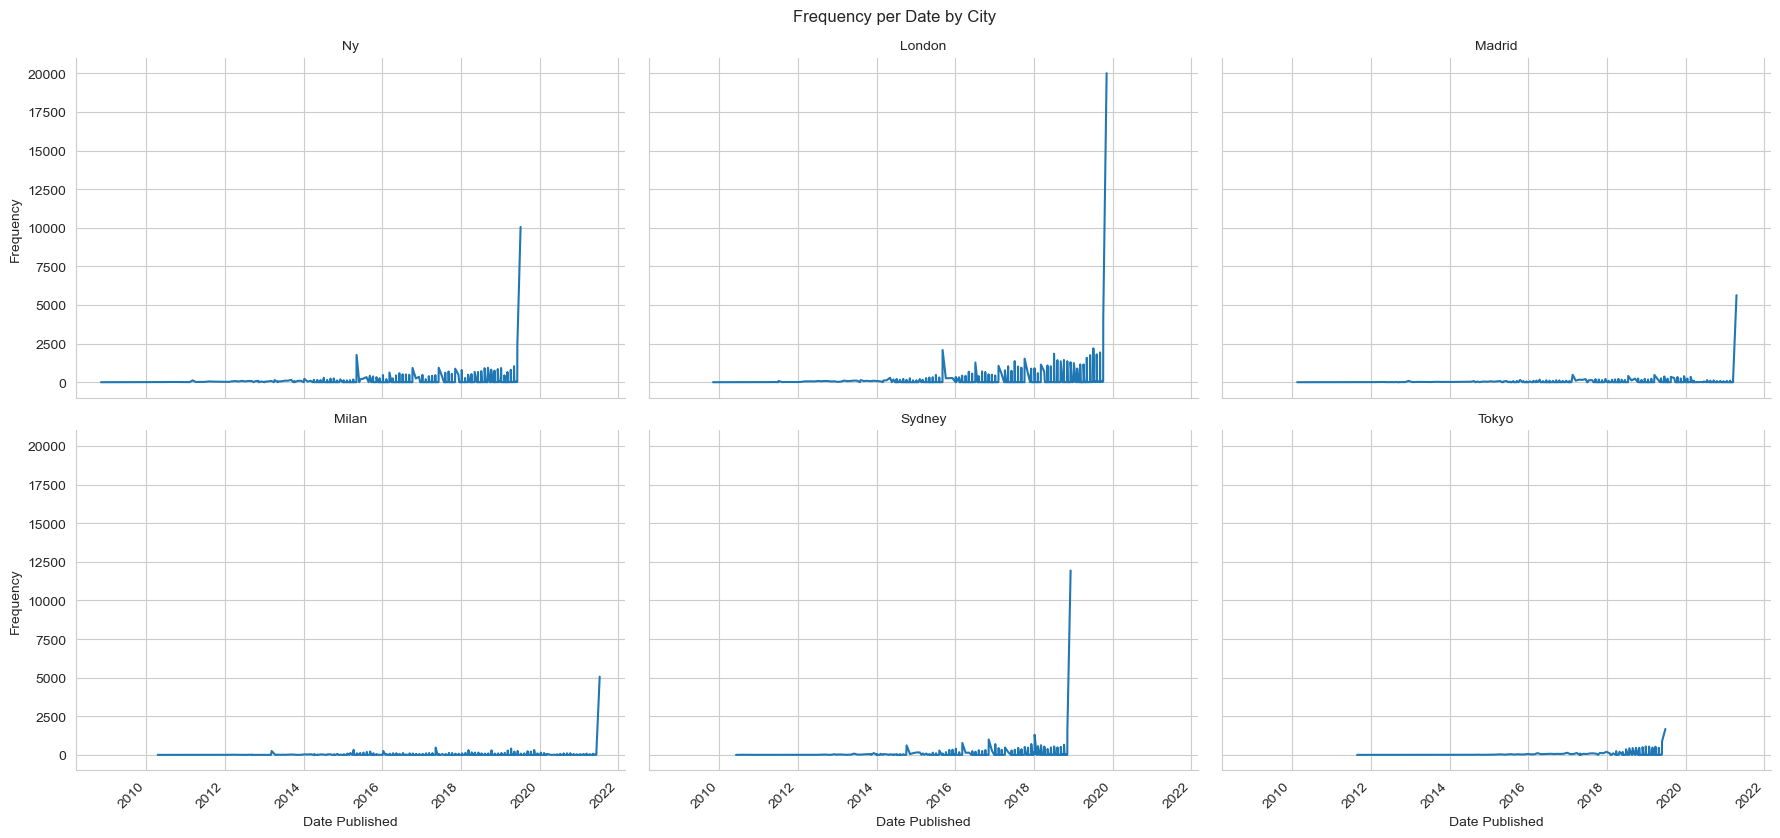

In [1044]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by date_published and city to get the frequency per date
date_freq = df.groupby(['date_published', 'city']).size().reset_index(name='frequency')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a FacetGrid to plot multiple line plots, one for each city
g = sns.FacetGrid(date_freq, col="city", col_wrap=3, height=4, aspect=1.5)

# Map the data to the FacetGrid
g.map(sns.lineplot, "date_published", "frequency")

# Add titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Date Published", "Frequency")
g.fig.suptitle('Frequency per Date by City', y=1.02)

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

plt.show()

Analizar los valores del campo numero de reviews cuando reviews por mes son nulas

In [1045]:
# Filter the DataFrame where 'reviews_per_month' is null
null_reviews_per_month_df = df[df['reviews_per_month'].isnull()]

# Group by city and count the number of records where 'number_of_reviews' is equal to zero
zero_reviews_count = null_reviews_per_month_df[null_reviews_per_month_df['number_of_reviews'] == 0].groupby('city').size()

# Group by city and count the number of records where 'number_of_reviews' is greater than zero
greater_than_zero_reviews_count = null_reviews_per_month_df[null_reviews_per_month_df['number_of_reviews'] > 0].groupby('city').size()

# Print the results
print("Number of records where 'reviews_per_month' is null and 'number_of_reviews' is equal to zero, by city:")
print(zero_reviews_count)

print("\nNumber of records where 'reviews_per_month' is null and 'number_of_reviews' is greater than zero, by city:")
print(greater_than_zero_reviews_count)


Number of records where 'reviews_per_month' is null and 'number_of_reviews' is equal to zero, by city:
Series([], dtype: int64)

Number of records where 'reviews_per_month' is null and 'number_of_reviews' is greater than zero, by city:
Series([], dtype: int64)


Fechas mínimas y máximas de publicación de anuncios:

In [1046]:


# Group by city and aggregate to find the minimum and maximum dates
date_range_by_city = df.groupby('city')['date_published'].agg(['min', 'max'])

# Display the result
print(date_range_by_city)


              min        max
city                        
London 2009-11-06 2019-11-06
Madrid 2010-02-17 2021-04-17
Milan  2010-04-19 2021-07-11
Ny     2008-11-08 2019-07-08
Sydney 2010-06-07 2018-12-07
Tokyo  2011-08-27 2019-06-27


## Neighbourhood Group

#### London

In [1047]:
# Select distinct neighbourhoods where city is London
distinct_neighbourhoods_london = df[df['city'] == 'London']['neighbourhood'].unique()

# Display the distinct neighbourhoods
print(distinct_neighbourhoods_london)

['Lambeth' 'Islington' 'Kensington and Chelsea' 'Westminster' 'Wandsworth'
 'Croydon' 'Tower Hamlets' 'Hammersmith and Fulham' 'Barnet' 'Merton'
 'Hounslow' 'Camden' 'Haringey' 'Richmond upon Thames' 'Southwark'
 'Hackney' 'Brent' 'Ealing' 'Waltham Forest' 'Newham' 'Lewisham' 'Enfield'
 'City of London' 'Greenwich' 'Bromley' 'Hillingdon' 'Havering'
 'Barking and Dagenham' 'Harrow' 'Redbridge' 'Kingston upon Thames'
 'Bexley' 'Sutton']


In [1048]:
# Dictionary of London's boroughs with their corresponding sub-regions
london_boroughs_subregions = {
    'Barking and Dagenham': 'East',
    'Barnet': 'North',
    'Bexley': 'East',
    'Brent': 'West',
    'Bromley': 'South',
    'Camden': 'Central',
    'Croydon': 'South',
    'Ealing': 'West',
    'Enfield': 'North',
    'Greenwich': 'East',
    'Hackney': 'Central',
    'Hammersmith and Fulham': 'West',
    'Haringey': 'North',
    'Harrow': 'West',
    'Havering': 'East',
    'Hillingdon': 'West',
    'Hounslow': 'West',
    'Islington': 'Central',
    'Kensington and Chelsea': 'Central',
    'Kingston upon Thames': 'South',
    'Lambeth': 'Central',
    'Lewisham': 'Central',
    'Merton': 'South',
    'Newham': 'East',
    'Redbridge': 'East',
    'Richmond upon Thames': 'South',
    'Southwark': 'Central',
    'Sutton': 'South',
    'Tower Hamlets': 'Central',
    'Waltham Forest': 'East',
    'Wandsworth': 'Central',
    'Westminster': 'Central',
    'City of London': 'Central'
}

# Print number of nulls in neighbourhood_group before mapping
print("Number of nulls in 'neighbourhood_group' before mapping:", df.loc[df['city'] == 'London', 'neighbourhood_group'].isnull().sum())

# Map the neighbourhood to the corresponding sub-region for London
df.loc[df['city'] == 'London', 'neighbourhood_group'] = df.loc[df['city'] == 'London', 'neighbourhood'].map(london_boroughs_subregions)

# Print number of nulls in neighbourhood_group after mapping
print("Number of nulls in 'neighbourhood_group' before mapping:", df.loc[df['city'] == 'London', 'neighbourhood_group'].isnull().sum())

Number of nulls in 'neighbourhood_group' before mapping: 85068
Number of nulls in 'neighbourhood_group' before mapping: 0


#### Sydney

In [1049]:
# Select distinct neighbourhoods where city is London
distinct_neighbourhoods_sydney = df[df['city'] == 'Sydney']['neighbourhood'].unique()

# Display the distinct neighbourhoods
print(distinct_neighbourhoods_sydney)

# Print number of nulls in neighbourhood_group before mapping
print("Number of nulls in 'neighbourhood_group' before mapping:", df.loc[df['city'] == 'Sydney', 'neighbourhood_group'].isnull().sum())

['Sydney' 'Manly' 'Leichhardt' 'Woollahra' 'North Sydney' 'Waverley'
 'Mosman' 'Pittwater' 'Lane Cove' 'Marrickville' 'The Hills Shire'
 'Hornsby' 'Warringah' 'Randwick' 'Sutherland Shire' 'Ku-Ring-Gai'
 'Canterbury' 'Blacktown' 'Willoughby' 'Auburn' 'Canada Bay' 'Ashfield'
 'City Of Kogarah' 'Parramatta' 'Hurstville' 'Ryde' 'Rockdale'
 'Botany Bay' 'Holroyd' 'Penrith' 'Hunters Hill' 'Burwood' 'Campbelltown'
 'Strathfield' 'Camden' 'Liverpool' 'Bankstown' 'Fairfield']
Number of nulls in 'neighbourhood_group' before mapping: 36662


In [1050]:
# Dictionary of Sydney's neighbourhoods with their corresponding higher-level regions
sydney_neighbourhoods_regions = {
    'Sydney': 'Sydney',
    'Manly': 'Northern Beaches',
    'Leichhardt': 'Inner West',
    'Woollahra': 'Eastern Suburbs',
    'North Sydney': 'Lower North Shore',
    'Waverley': 'Eastern Suburbs',
    'Mosman': 'Lower North Shore',
    'Pittwater': 'Northern Beaches',
    'Lane Cove': 'Lower North Shore',
    'Marrickville': 'Inner West',
    'The Hills Shire': 'Hills District',
    'Hornsby': 'Upper North Shore',
    'Warringah': 'Northern Beaches',
    'Randwick': 'Eastern Suburbs',
    'Sutherland Shire': 'Southern Sydney',
    'Ku-Ring-Gai': 'Upper North Shore',
    'Canterbury': 'Inner West',
    'Blacktown': 'Western Sydney',
    'Willoughby': 'Lower North Shore',
    'Auburn': 'Western Sydney',
    'Canada Bay': 'Inner West',
    'Ashfield': 'Inner West',
    'City Of Kogarah': 'Southern Sydney',
    'Parramatta': 'Western Sydney',
    'Hurstville': 'Southern Sydney',
    'Ryde': 'Northern Suburbs',
    'Rockdale': 'Southern Sydney',
    'Botany Bay': 'Eastern Suburbs',
    'Holroyd': 'Western Sydney',
    'Penrith': 'Western Sydney',
    'Hunters Hill': 'Lower North Shore',
    'Burwood': 'Inner West',
    'Campbelltown': 'South-western Sydney',
    'Strathfield': 'Inner West',
    'Camden': 'South-western Sydney',
    'Liverpool': 'South-western Sydney',
    'Bankstown': 'Western Sydney',
    'Fairfield': 'Western Sydney'
}

# Print number of nulls in neighbourhood_group before mapping
print("Number of nulls in 'neighbourhood_group' before mapping:", df.loc[df['city'] == 'Sydney', 'neighbourhood_group'].isnull().sum())

# Map the neighbourhood to the corresponding higher-level region for Sydney
df.loc[df['city'] == 'Sydney', 'neighbourhood_group'] = df.loc[df['city'] == 'Sydney', 'neighbourhood'].map(sydney_neighbourhoods_regions)

# Print number of nulls in neighbourhood_group after mapping
print("Number of nulls in 'neighbourhood_group' after mapping:", df.loc[df['city'] == 'Sydney', 'neighbourhood_group'].isnull().sum())

Number of nulls in 'neighbourhood_group' before mapping: 36662
Number of nulls in 'neighbourhood_group' after mapping: 0


#### Milan

In [1051]:
# Select distinct neighbourhoods where city is Milan
distinct_neighbourhoods_milan = df[df['city'] == 'Milan']['neighbourhood'].unique()

# Display the distinct neighbourhoods
print(distinct_neighbourhoods_milan)

# Print number of nulls in neighbourhood_group before mapping
print("Number of nulls in 'neighbourhood_group' before mapping:", df.loc[df['city'] == 'Milan', 'neighbourhood_group'].isnull().sum())

['Tibaldi' 'Navigli' 'Sarpi' 'Viale Monza' 'Buenos Aires - Venezia'
 'Magenta - S. Vittore' 'Centrale' 'Xxii Marzo' 'Brera' 'Duomo' 'Ticinese'
 'Isola' 'Bande Nere' 'Washington' 'Umbria - Molise'
 'Parco Forlanini - Ortica' 'Lambrate' 'Villapizzone' 'Guastalla'
 "Citta' Studi" 'Stadera' 'S. Siro' 'S. Cristoforo' 'Giambellino' 'Padova'
 'Loreto' 'De Angeli - Monte Rosa' 'Bovisasca' 'Porta Romana' 'Tortona'
 'Gratosoglio - Ticinello' 'Vigentina' 'Bicocca' 'Garibaldi Repubblica'
 'Ghisolfa' 'Ripamonti' 'Portello' 'Sacco' 'Parco Lambro - Cimiano'
 'Ronchetto Sul Naviglio' 'Bovisa' 'Lodi - Corvetto' 'Forze Armate'
 'Baggio' 'Barona' 'Pagano' 'Farini' 'Scalo Romana' 'Corsica' 'Greco'
 'Gallaratese' 'Ex Om - Morivione' 'Ortomercato' 'Maciachini - Maggiolina'
 "Niguarda - Ca' Granda" 'Maggiore - Musocco' 'Lorenteggio' 'Dergano'
 'Tre Torri' 'Adriano' 'Quinto Romano' 'Quarto Cagnino' 'Comasina'
 'Rogoredo' 'Qt 8' 'Selinunte' 'Mecenate' 'Quarto Oggiaro'
 'Triulzo Superiore' 'Affori' 'Bruzzano' "

In [1052]:
# Dictionary of Milan's neighbourhoods with their corresponding higher-level groupings
milan_neighbourhoods_groupings = {
    'Tibaldi': 'Zone 5',
    'Navigli': 'Zone 6',
    'Sarpi': 'Zone 1',
    'Viale Monza': 'Zone 2',
    'Buenos Aires - Venezia': 'Zone 3',
    'Magenta - S. Vittore': 'Zone 1',
    'Centrale': 'Zone 2',
    'Xxii Marzo': 'Zone 4',
    'Brera': 'Zone 1',
    'Duomo': 'Zone 1',
    'Ticinese': 'Zone 1',
    'Isola': 'Zone 9',
    'Bande Nere': 'Zone 7',
    'Washington': 'Zone 7',
    'Umbria - Molise': 'Zone 4',
    'Parco Forlanini - Ortica': 'Zone 3',
    'Lambrate': 'Zone 3',
    'Villapizzone': 'Zone 8',
    'Guastalla': 'Zone 1',
    "Citta' Studi": 'Zone 3',
    'Stadera': 'Zone 5',
    'S. Siro': 'Zone 7',
    'S. Cristoforo': 'Zone 6',
    'Giambellino': 'Zone 6',
    'Padova': 'Zone 2',
    'Loreto': 'Zone 2',
    'De Angeli - Monte Rosa': 'Zone 7',
    'Bovisasca': 'Zone 9',
    'Porta Romana': 'Zone 4',
    'Tortona': 'Zone 6',
    'Gratosoglio - Ticinello': 'Zone 5',
    'Vigentina': 'Zone 5',
    'Bicocca': 'Zone 9',
    'Garibaldi Repubblica': 'Zone 9',
    'Ghisolfa': 'Zone 9',
    'Ripamonti': 'Zone 5',
    'Portello': 'Zone 8',
    'Sacco': 'Zone 8',
    'Parco Lambro - Cimiano': 'Zone 3',
    'Ronchetto Sul Naviglio': 'Zone 6',
    'Bovisa': 'Zone 9',
    'Lodi - Corvetto': 'Zone 4',
    'Forze Armate': 'Zone 7',
    'Baggio': 'Zone 7',
    'Barona': 'Zone 6',
    'Pagano': 'Zone 1',
    'Farini': 'Zone 9',
    'Scalo Romana': 'Zone 5',
    'Corsica': 'Zone 4',
    'Greco': 'Zone 2',
    'Gallaratese': 'Zone 8',
    'Ex Om - Morivione': 'Zone 5',
    'Ortomercato': 'Zone 4',
    'Maciachini - Maggiolina': 'Zone 9',
    "Niguarda - Ca' Granda": 'Zone 9',
    'Maggiore - Musocco': 'Zone 8',
    'Lorenteggio': 'Zone 6',
    'Dergano': 'Zone 9',
    'Tre Torri': 'Zone 8',
    'Adriano': 'Zone 2',
    'Quinto Romano': 'Zone 7',
    'Quarto Cagnino': 'Zone 7',
    'Comasina': 'Zone 9',
    'Rogoredo': 'Zone 4',
    'Qt 8': 'Zone 8',
    'Selinunte': 'Zone 7',
    'Mecenate': 'Zone 4',
    'Quarto Oggiaro': 'Zone 8',
    'Triulzo Superiore': 'Zone 5',
    'Affori': 'Zone 9',
    'Bruzzano': 'Zone 9',
    "Parco Monlue' - Ponte Lambro": 'Zone 4',
    'Chiaravalle': 'Zone 5',
    'Giardini Porta Venezia': 'Zone 1',
    'Parco Sempione': 'Zone 1',
    'Parco Bosco In Città': 'Zone 8',
    'Parco Bosco In Citt\x85': 'Zone 8',
    'Parco Agricolo Sud': 'Zone 5',
    'Figino': 'Zone 7',
    'Parco Nord': 'Zone 9',
    'Parco Delle Abbazie': 'Zone 5',
    'Parco Dei Navigli': 'Zone 6',
    'Trenno': 'Zone 8',
    'Cantalupa': 'Zone 7',
    'Quintosole': 'Zone 5',
    'Muggiano': 'Zone 7',
    'Stephenson': 'Zone 8',
    'Cascina Triulza - Expo': 'Zone 8'
}

# Print number of nulls in neighbourhood_group before mapping
print("Number of nulls in 'neighbourhood_group' before mapping:", df.loc[df['city'] == 'Milan', 'neighbourhood_group'].isnull().sum())

# Map the neighbourhood to the corresponding higher-level region for Sydney
df.loc[df['city'] == 'Milan', 'neighbourhood_group'] = df.loc[df['city'] == 'Milan', 'neighbourhood'].map(milan_neighbourhoods_groupings)

# Print number of nulls in neighbourhood_group before mapping
print("Number of nulls in 'neighbourhood_group' before mapping:", df.loc[df['city'] == 'Milan', 'neighbourhood_group'].isnull().sum())

Number of nulls in 'neighbourhood_group' before mapping: 18322
Number of nulls in 'neighbourhood_group' before mapping: 0


Corrección de los 4 registros que tenían mál el neighbourhood. Cambio de 'Parco Bosco In Citt\x85' a 'Parco Bosco In Città'

In [1053]:
# Update Milan's neighbourhood from 'Parco Bosco In Citt\x85' to 'Parco Bosco In Città'
df.loc[df['city'] == 'Milan', 'neighbourhood'] = df.loc[df['city'] == 'Milan', 'neighbourhood'].replace('Parco Bosco In Citt\x85', 'Parco Bosco In Città')

#### Tokyo

In [1054]:
# Select distinct neighbourhoods where city is Milan
distinct_neighbourhoods_tokyo = df[df['city'] == 'Tokyo']['neighbourhood'].unique()

# Display the distinct neighbourhoods
print(distinct_neighbourhoods_tokyo)

# Print number of nulls in neighbourhood_group before mapping
print("Number of nulls in 'neighbourhood_group' before mapping:", df.loc[df['city'] == 'Tokyo', 'neighbourhood_group'].isnull().sum())

['Shibuya Ku' 'Sumida Ku' 'Nerima Ku' 'Setagaya Ku' 'Arakawa Ku'
 'Shinjuku Ku' 'Mitaka Shi' 'Adachi Ku' 'Katsushika Ku' 'Meguro Ku'
 'Toshima Ku' 'Minato Ku' 'Shinagawa Ku' 'Suginami Ku' 'Koto Ku'
 'Akishima Shi' 'Bunkyo Ku' 'Taito Ku' 'Itabashi Ku' 'Ota Ku' 'Edogawa Ku'
 'Machida Shi' 'Kita Ku' 'Higashimurayama Shi' 'Nakano Ku' 'Hino Shi'
 'Hachioji Shi' 'Koganei Shi' 'Kokubunji Shi' 'Ogasawara Mura'
 'Musashino Shi' 'Okutama Machi' 'Kodaira Shi' 'Akiruno Shi' 'Chiyoda Ku'
 'Chuo Ku' 'Fuchu Shi' 'Inagi Shi' 'Fussa Shi' 'Tama Shi' 'Nishitokyo Shi'
 'Komae Shi' 'Chofu Shi' 'Hinohara Mura' 'Ome Shi' 'Oshima Machi'
 'Kozushima Mura' 'Higashiyamato Shi' 'Hamura Shi' 'Tachikawa Shi'
 'Musashimurayama Shi' 'Niijima Mura' 'Hachijo Machi' 'Miyake Mura'
 'Kunitachi Shi' 'Higashikurume Shi']
Number of nulls in 'neighbourhood_group' before mapping: 11466


In [1055]:
# Dictionary of Tokyo's neighbourhoods with their corresponding higher-level groupings
tokyo_neighbourhoods_groupings = {
    'Shibuya Ku': 'Central Tokyo',
    'Sumida Ku': 'Eastern Tokyo',
    'Nerima Ku': 'Western Tokyo',
    'Setagaya Ku': 'Western Tokyo',
    'Arakawa Ku': 'Eastern Tokyo',
    'Shinjuku Ku': 'Central Tokyo',
    'Mitaka Shi': 'Western Tokyo',
    'Adachi Ku': 'Northern Tokyo',
    'Katsushika Ku': 'Eastern Tokyo',
    'Meguro Ku': 'Central Tokyo',
    'Toshima Ku': 'Central Tokyo',
    'Minato Ku': 'Central Tokyo',
    'Shinagawa Ku': 'Central Tokyo',
    'Suginami Ku': 'Western Tokyo',
    'Koto Ku': 'Eastern Tokyo',
    'Akishima Shi': 'Western Tokyo',
    'Bunkyo Ku': 'Central Tokyo',
    'Taito Ku': 'Central Tokyo',
    'Itabashi Ku': 'Northern Tokyo',
    'Ota Ku': 'Southern Tokyo',
    'Edogawa Ku': 'Eastern Tokyo',
    'Machida Shi': 'Western Tokyo',
    'Kita Ku': 'Northern Tokyo',
    'Higashimurayama Shi': 'Western Tokyo',
    'Nakano Ku': 'Central Tokyo',
    'Hino Shi': 'Western Tokyo',
    'Hachioji Shi': 'Western Tokyo',
    'Koganei Shi': 'Western Tokyo',
    'Kokubunji Shi': 'Western Tokyo',
    'Ogasawara Mura': 'Islands',
    'Musashino Shi': 'Western Tokyo',
    'Okutama Machi': 'Western Tokyo',
    'Kodaira Shi': 'Western Tokyo',
    'Akiruno Shi': 'Western Tokyo',
    'Chiyoda Ku': 'Central Tokyo',
    'Chuo Ku': 'Central Tokyo',
    'Fuchu Shi': 'Western Tokyo',
    'Inagi Shi': 'Western Tokyo',
    'Fussa Shi': 'Western Tokyo',
    'Tama Shi': 'Western Tokyo',
    'Nishitokyo Shi': 'Western Tokyo',
    'Komae Shi': 'Western Tokyo',
    'Chofu Shi': 'Western Tokyo',
    'Hinohara Mura': 'Western Tokyo',
    'Ome Shi': 'Western Tokyo',
    'Oshima Machi': 'Islands',
    'Kozushima Mura': 'Islands',
    'Higashiyamato Shi': 'Western Tokyo',
    'Hamura Shi': 'Western Tokyo',
    'Tachikawa Shi': 'Western Tokyo',
    'Musashimurayama Shi': 'Western Tokyo',
    'Niijima Mura': 'Islands',
    'Hachijo Machi': 'Islands',
    'Miyake Mura': 'Islands',
    'Kunitachi Shi': 'Western Tokyo',
    'Higashikurume Shi': 'Western Tokyo'
}

# Print number of nulls in neighbourhood_group before mapping
print("Number of nulls in 'neighbourhood_group' before mapping:", df.loc[df['city'] == 'Tokyo', 'neighbourhood_group'].isnull().sum())

# Map the neighbourhood to the corresponding higher-level region for Tokyo
df.loc[df['city'] == 'Tokyo', 'neighbourhood_group'] = df.loc[df['city'] == 'Tokyo', 'neighbourhood'].map(tokyo_neighbourhoods_groupings)

# Print number of nulls in neighbourhood_group after mapping
print("Number of nulls in 'neighbourhood_group' after mapping:", df.loc[df['city'] == 'Tokyo', 'neighbourhood_group'].isnull().sum())

Number of nulls in 'neighbourhood_group' before mapping: 11466
Number of nulls in 'neighbourhood_group' after mapping: 0


In [1056]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220031 entries, 0 to 220030
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              220031 non-null  int64         
 1   name                            219964 non-null  object        
 2   host_id                         220031 non-null  int64         
 3   host_name                       219325 non-null  object        
 4   neighbourhood_group             220031 non-null  object        
 5   neighbourhood                   220031 non-null  object        
 6   latitude                        220031 non-null  float64       
 7   longitude                       220031 non-null  float64       
 8   room_type                       220031 non-null  object        
 9   price                           220031 non-null  int64         
 10  minimum_nights                  220031 non-null  int64  

In [1057]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city,date_published,price_usd,price_eur
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,Central,Lambeth,51.46225,-0.11732,Entire home/apt,88,3,185,2019-09-15,1.58,2.0,336.0,London,2010-02-06,113.87,102.06
1,13913,Holiday London DB Room Let-on going,54730,Alina,Central,Islington,51.56802,-0.11121,Private room,65,1,19,2019-10-07,0.17,2.0,365.0,London,2010-08-06,84.11,75.39
2,90700,Sunny Notting Hill flat & terrace,491286,Chil,Central,Kensington and Chelsea,51.51074,-0.19853,Entire home/apt,105,2,339,2019-07-30,3.33,2.0,268.0,London,2011-06-06,135.87,121.78
3,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,Central,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,30,88,2019-09-23,0.73,1.0,158.0,London,2009-11-06,129.40,115.98
4,92399,"MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...",497366,Andrea & Mark,Central,Islington,51.55071,-0.08547,Private room,77,1,207,2019-10-21,2.04,2.0,336.0,London,2011-06-06,99.64,89.30


#### Análisis de nulos

<Axes: >

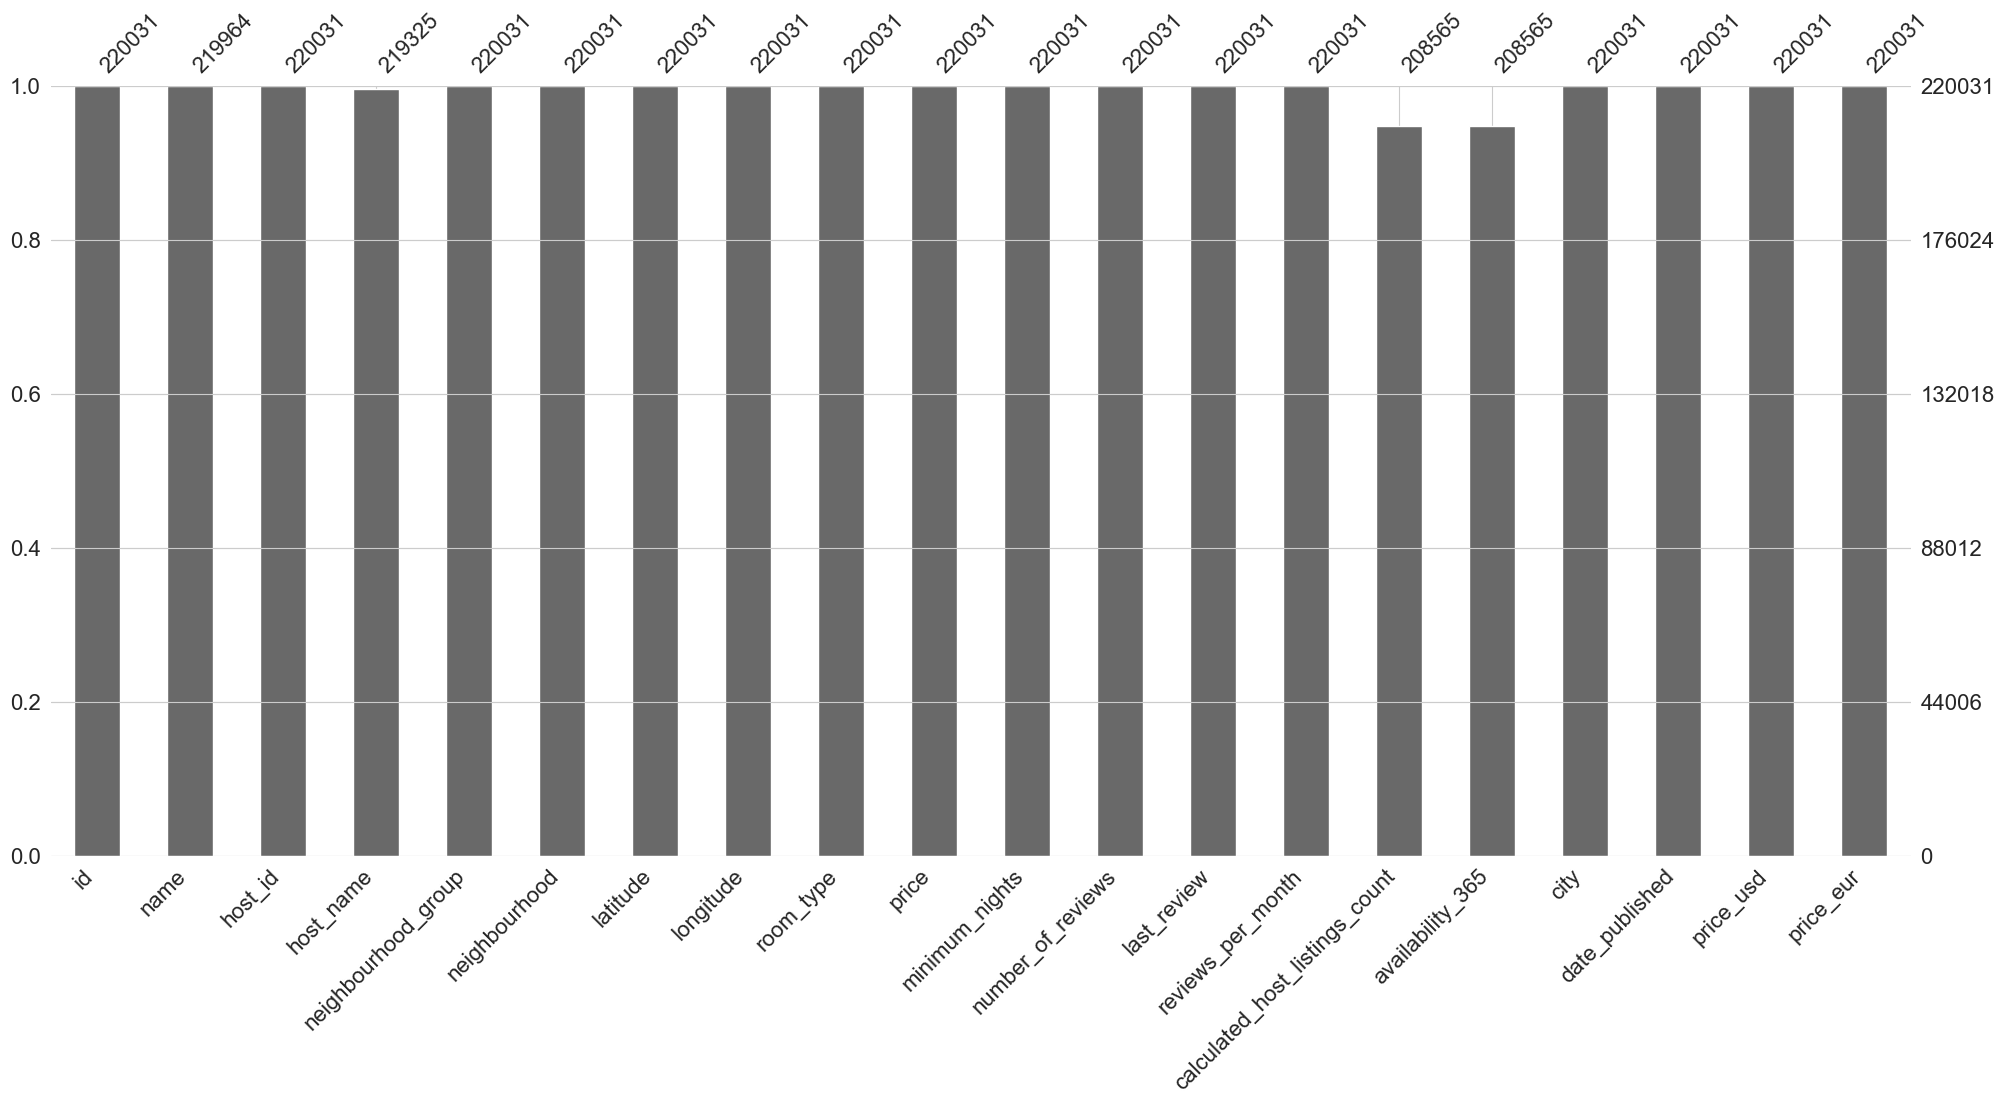

In [1058]:
msno.bar(df)

#### Corregir los nulos en calculated_host_listings_count

Dado que cada registro es una propiedad, se rellena el campo con la cuenta de registros por propietario.

Nota: No se consideran para el cálculo los registros que tienen la bandera active_ad apagada. Tampoco se actualizan

In [1059]:
# Group by 'host_id' and count the number of records for each group
host_counts = df.groupby(['host_id']).size().reset_index(name='host_count')

# Merge the counts back into the original DataFrame
df = df.merge(host_counts, on=['host_id'], how='left')

# Fill null values in 'calculated_host_listings_count' with the corresponding 'host_count'
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].fillna(df['host_count'])

# Drop the intermediate 'host_count' column
df.drop(columns=['host_count'], inplace=True)

#### Corregir los nulos en availability_365

* Los nulos en availability_365 se corrigen de la siguiente manera:

* Si el mismo host tiene otras propiedades con datos en el campo availability_365, el valor nulo se rellena con el promedio de availability_365 de ese cliente.

* Si el mismo host no tiene otras propiedades con las cuales calcular el promedio de availability_365, se rellena con 0.



In [1060]:
# Function to calculate the replacement value for null availability_365
def replace_null_availability(row, df):
    if pd.isnull(row['availability_365']):
        host_id = row['host_id']
        # Get all rows with the same host_id
        host_rows = df[df['host_id'] == host_id]
        # Calculate the average availability_365 excluding null values
        avg_availability = host_rows['availability_365'].mean(skipna=True)
        # If the average is NaN (i.e., all values are null), return 0
        if pd.isnull(avg_availability):
            return 0
        else:
            return avg_availability
    else:
        return row['availability_365']

# Apply the function to each row in the DataFrame
df['availability_365'] = df.apply(lambda row: replace_null_availability(row, df), axis=1)


## Ingresos potenciales

#### Ingresos potenciales por propiedad en usd y eur



In [1061]:
# Create new columns by multiplying availability_365 by price, price_usd, and price_eur
#df['y_income_local'] = df.apply(lambda row: round(row['availability_365'] * row['price'], 2), axis=1)
#df['y_income_usd'] = df.apply(lambda row: round(row['availability_365'] * row['price_usd'], 2), axis=1)
#df['y_income_eur'] = df.apply(lambda row: round(row['availability_365'] * row['price_eur'], 2), axis=1)


### Analisis de Ouliers

#### Outliers en precio

El análisis se hace sólo hacia el extremo superior. Este puede estar influenciado por los extras que cada anfitrión define, además de la ubicación. Este análisis se hace por ciudad + barrio + tipo de habitación. Los outliers son aquellos se han definido en este proyecto como aquellos registros que, por precio, exceden 2,5 veces el IQR para su área específica.

In [1062]:
# Group by city and room_type and calculate the IQR for price_usd
iqr_data = df.groupby(['city', 'neighbourhood', 'room_type'])['price_usd'].agg(
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75)
).reset_index()

# Calculate the IQR
iqr_data['IQR'] = iqr_data['Q3'] - iqr_data['Q1']

# Calculate the lower and upper bounds for outliers
iqr_data['upper_bound'] = iqr_data['Q3'] + 2.5 * iqr_data['IQR']

# Merge the IQR data back into the original DataFrame
df = df.merge(iqr_data[['city', 'neighbourhood', 'room_type', 'upper_bound']], on=['city', 'neighbourhood', 'room_type'], how='left')

# Identify outliers
df['is_outlier'] = df['price_usd'] > df['upper_bound']

# Group by city, neighbourhood_group, and room_type to count the number of lower and upper outliers
upper_outlier_counts = df.groupby(['city', 'neighbourhood', 'room_type'])['is_outlier'].sum().reset_index(name='upper_outlier_count')

# Merge the outlier counts back into the IQR data
iqr_data = iqr_data.merge(upper_outlier_counts, on=['city', 'neighbourhood', 'room_type'], how='left')

# Drop the 'upper_bound' column from the DataFrame
df.drop(columns=['upper_bound'], inplace=True)


In [1063]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220031 entries, 0 to 220030
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              220031 non-null  int64         
 1   name                            219964 non-null  object        
 2   host_id                         220031 non-null  int64         
 3   host_name                       219325 non-null  object        
 4   neighbourhood_group             220031 non-null  object        
 5   neighbourhood                   220031 non-null  object        
 6   latitude                        220031 non-null  float64       
 7   longitude                       220031 non-null  float64       
 8   room_type                       220031 non-null  object        
 9   price                           220031 non-null  int64         
 10  minimum_nights                  220031 non-null  int64  

Para enriquecer tu dataset de propiedades de AirBnB y realizar un análisis más completo del mercado inmobiliario, puedes considerar añadir las siguientes fuentes de datos:

### 1. **Datos del mercado inmobiliario:**
   - **Precios de la vivienda por zona:** Puedes obtener datos históricos y actuales de precios de compra y renta por área o código postal para comparar el valor de las propiedades en tu dataset.
     - Fuentes: Agencias inmobiliarias locales, portales como Zillow (para Nueva York) o Idealista (para Madrid y Milán).

### 2. **Datos demográficos:**
   - **Ingreso medio por área:** Los ingresos de los residentes en las diferentes áreas pueden ofrecerte información sobre el poder adquisitivo y la demanda de ciertos tipos de propiedades.
   - **Densidad de población:** Datos sobre cuántas personas viven por kilómetro cuadrado te pueden ayudar a comprender la demanda de propiedades en áreas específicas.
     - Fuentes: Oficinas estadísticas nacionales o municipales.

### 3. **Datos de desarrollo urbano e infraestructura:**
   - **Acceso a transporte público:** Información sobre la proximidad a estaciones de metro, tren, autobuses, etc., puede ser un factor clave que influya en los precios de las propiedades.
   - **Zonas de desarrollo económico o proyectos de infraestructura:** Áreas que estén siendo desarrolladas o reurbanizadas pueden tener un impacto futuro en los precios.
     - Fuentes: Mapas de transporte público, planes de desarrollo urbano de cada ciudad.

### 4. **Índices de calidad de vida:**
   - **Índices de calidad de vida por barrio:** Incluye variables como seguridad, educación, y acceso a servicios de salud que pueden afectar el atractivo de una propiedad.
     - Fuentes: Índices internacionales como los de Mercer o Numbeo.

### 5. **Tendencias del turismo y economía local:**
   - **Ocupación hotelera y demanda turística:** Dado que las propiedades de AirBnB a menudo están ligadas al turismo, datos sobre la cantidad de turistas que visitan esas áreas, ocupación hotelera o eventos locales puede complementar tu análisis.
     - Fuentes: Oficinas de turismo locales, Google Trends.

### 6. **Normativas locales sobre alquileres:**
   - **Regulaciones de alquileres cortos:** En muchas ciudades, los alquileres de corto plazo (como los de AirBnB) están regulados o restringidos, lo que puede afectar la oferta y los precios.
     - Fuentes: Páginas web de gobiernos locales o artículos de medios especializados.

Estas capas de datos te permitirán realizar un análisis más detallado, permitiéndote identificar factores externos que influyen en los precios y en la oferta y demanda de propiedades.

#### Exportar el dataframe df a csv para un analisis en otra herramienta

In [1064]:
df.to_csv('airbnb_data_preprocessed.csv', index=False, encoding='utf-8', sep=',', decimal='.')

In [1065]:
df.to_parquet('airbnb_data_preprocessed.parquet', index=False)

#### A Partir de aquí, se avanza en el analisis tanto en PowerBI como por aquí